<a href="https://colab.research.google.com/github/linhoangce/ml_with_pytorch_and_scikitlearn/blob/main/chapter4_practice_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [133]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [134]:
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


In [135]:
# `values` attr returns NumPy array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Eliminate missing values

In [136]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [137]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [138]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [139]:
csv_data = '''A,B,C,D,E,F
              1.0,2.0,3.0,4.0,5.
              5.0,6.0,,8.0,,16
              10.0,,11.0,12.0,13.,14.'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,NaN
1,5.0,6.0,NaN,8.0,NaN,16.0
2,10.0,NaN,11.0,12.0,13.0,14.0


In [140]:
df.dropna(thresh=5)

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,NaN
2,10.0,NaN,11.0,12.0,13.0,14.0


In [141]:
df.dropna(thresh=4)

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,NaN
1,5.0,6.0,NaN,8.0,NaN,16.0
2,10.0,NaN,11.0,12.0,13.0,14.0


In [142]:
df.dropna(subset=['C', 'F'])

,A,B,C,D,E,F
2,10.0,NaN,11.0,12.0,13.0,14.0


In [143]:
df.dropna(subset=['B'])

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,NaN
1,5.0,6.0,NaN,8.0,NaN,16.0


### Imputing missing values

In [144]:
# mean imputation with SimpleImputer from scikit-learn
from sklearn.impute import SimpleImputer
import numpy as np

# initialize and compute mean values per col
si = SimpleImputer(missing_values=np.nan,
                   strategy='mean')
si = si.fit(df.values)

# fill missing values with mean values per col
imputed_data = si.transform(df.values)
df.values, imputed_data

(array([[ 1.,  2.,  3.,  4.,  5., nan],
        [ 5.,  6., nan,  8., nan, 16.],
        [10., nan, 11., 12., 13., 14.]]),
 array([[ 1.,  2.,  3.,  4.,  5., 15.],
        [ 5.,  6.,  7.,  8.,  9., 16.],
        [10.,  4., 11., 12., 13., 14.]]))

In [145]:
# fill missing values with mean values with DataFrame
df.fillna(df.mean())

,A,B,C,D,E,F
0,1.0,2.0,3.0,4.0,5.0,15.0
1,5.0,6.0,7.0,8.0,9.0,16.0
2,10.0,4.0,11.0,12.0,13.0,14.0


In [146]:
df.mean()

,0
A,5.333333
B,4.000000
C,7.000000
D,8.000000
E,9.000000
F,15.000000


In [147]:
df.isna(), df.isnull()

(       A      B      C      D      E      F
 0  False  False  False  False  False   True
 1  False  False   True  False   True  False
 2  False   True  False  False  False  False,
        A      B      C      D      E      F
 0  False  False  False  False  False   True
 1  False  False   True  False   True  False
 2  False   True  False  False  False  False)

## Handling categorical data

In [148]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])

# provide column names
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [149]:
# mapping ordinal data
df['size']

,size
0,M
1,L
2,XL


In [150]:
# manual mapping using dict
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [151]:
# revert mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping), inv_size_mapping

(0     M
 1     L
 2    XL
 Name: size, dtype: object,
 {3: 'XL', 2: 'L', 1: 'M'})

### Encode data label

In [152]:
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [153]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [154]:
# revert encoded labels
inv_class_mapping = {v: k for k, v in class_mapping.items()}
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [155]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df['classlabel']

,classlabel
0,class2
1,class1
2,class2


In [156]:
# encode labels with scikit-learn
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [157]:
# revert encoded labels
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

### Perform one-hot encoding on nomial features

In [158]:
# get a Numpy array of feature cols
X = df[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [159]:
X[:, 0]

array(['green', 'red', 'blue'], dtype=object)

In [160]:
from sklearn.preprocessing import LabelEncoder

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [161]:
X[:, 0].reshape(-1, 1)

array([[1],
       [2],
       [0]], dtype=object)

In [162]:
from sklearn.preprocessing import OneHotEncoder

color_ohe = OneHotEncoder()

# get a numpy array of feature cols
X = df[['color', 'size', 'price']].values
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [163]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [164]:
# selectively transform columns in a multi-feature array
# modify only the first column
# leave other two columns untouched
from sklearn.compose import ColumnTransformer

# get numpy arr of feature cols
X = df[['color', 'size', 'price']].values

c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [165]:
# one-hot encode with pandas, default bool
pd.get_dummies(df[['price', 'size', 'color']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [166]:
# one-hot encode, typed as int
pd.get_dummies(df[['price', 'size', 'color']],
               dtype=int)

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [167]:
# reduce feature dimension
pd.get_dummies(df[['price', 'size', 'color']],
               dtype=int,
               drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [168]:
# similarly, we can drop first col with OneHotEncoder
color_ohe = OneHotEncoder(categories='auto',
                          drop='first')

c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

### Encode ordinal features


In [169]:
 df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                    ['red', 'L', 13.5, 'class1'],
                    ['blue', 'XL', 15.3,'class2']])
 df

,0,1,2,3
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [170]:
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [171]:
# encode using value-threshold and lambda
df['x > M'] = df['size'].apply(
    lambda x: 1 if x in {'L', 'XL'} else 0
)

df['x > L'] = df['size'].apply(
    lambda x: 2 if x == 'XL' else 0
)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,2


## Partion datasets into train and test

In [173]:
# download Wine dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [174]:
len(df_wine)

178

In [177]:
# assign column names
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
print(f"Class label: {np.unique(df_wine['Class label'])}")

Class label: [1 2 3]


In [178]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

# get features and labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X, y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
 

In [181]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=y)
len(X_train), len(y_train), len(X_test), len(y_test)

(124, 124, 54, 54)

### Bring features onto same scale

In [182]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# normalize all features with min-max scaling [0, 1] range
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

X_train[:2], X_train_norm[:2]

(array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
         8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
         5.500e+02],
        [1.376e+01, 1.530e+00, 2.700e+00, 1.950e+01, 1.320e+02, 2.950e+00,
         2.740e+00, 5.000e-01, 1.350e+00, 5.400e+00, 1.250e+00, 3.000e+00,
         1.235e+03]]),
 array([[0.64619883, 0.83201581, 0.4248366 , 0.46236559, 0.27160494,
         0.35172414, 0.09704641, 0.68      , 0.18987342, 0.23623446,
         0.45744681, 0.28571429, 0.19400856],
        [0.6871345 , 0.15612648, 0.65359477, 0.43548387, 0.7654321 ,
         0.67931034, 0.50632911, 0.74      , 0.2943038 , 0.3250444 ,
         0.81914894, 0.63369963, 0.68259629]]))

In [183]:
# standardization vs normalization
ex = np.array([0, 1, 2, 3, 4, 5])
print(f'Normalization: {(ex - ex.min()) / (ex.max() - ex.min())}')
print(f'Standardization: {(ex - ex.mean()) / ex.std()}')

Normalization: [0.  0.2 0.4 0.6 0.8 1. ]
Standardization: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [184]:
# stardardization: zero mean and unit variance
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

X_train[:2], X_train_norm[:2], X_train_std[:2]

(array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
         8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
         5.500e+02],
        [1.376e+01, 1.530e+00, 2.700e+00, 1.950e+01, 1.320e+02, 2.950e+00,
         2.740e+00, 5.000e-01, 1.350e+00, 5.400e+00, 1.250e+00, 3.000e+00,
         1.235e+03]]),
 array([[0.64619883, 0.83201581, 0.4248366 , 0.46236559, 0.27160494,
         0.35172414, 0.09704641, 0.68      , 0.18987342, 0.23623446,
         0.45744681, 0.28571429, 0.19400856],
        [0.6871345 , 0.15612648, 0.65359477, 0.43548387, 0.7654321 ,
         0.67931034, 0.50632911, 0.74      , 0.2943038 , 0.3250444 ,
         0.81914894, 0.63369963, 0.68259629]]),
 array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
         -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
         -0.20017028, -0.82164144, -0.62946362],
        [ 0.88229214, -0.70457155,  1.17533605, -0.09065504,  2.34147876,
          1.016

## L1 and L2 Regularization

In [185]:
# L1 regularization
from sklearn.linear_model import LogisticRegression

# arg C is for adjusting strength of regularization
lr = LogisticRegression(penalty='l1',
                        C=0.1,
                        solver='liblinear',
                        multi_class='ovr')
lr.fit(X_train_std, y_train)
print(f'Training acc: {lr.score(X_train_std, y_train)}')
print(f'Test acc: {lr.score(X_test_std, y_test)}')

Training acc: 0.9596774193548387
Test acc: 1.0


In [186]:
# get weights and biases
lr.intercept_, lr.coef_

(array([-0.3187084 , -0.0990646 , -0.81388291]),
 array([[ 0.21968547,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.54265766,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  1.51420561],
        [-0.76581262, -0.04081136,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        , -0.82416746,
          0.00665241,  0.06476026, -0.41584977],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        , -0.74289438,  0.        ,  0.        ,  0.42943914,
         -0.31937399, -0.52024139,  0.        ]]))

### Visualize how L1 regularization effect

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

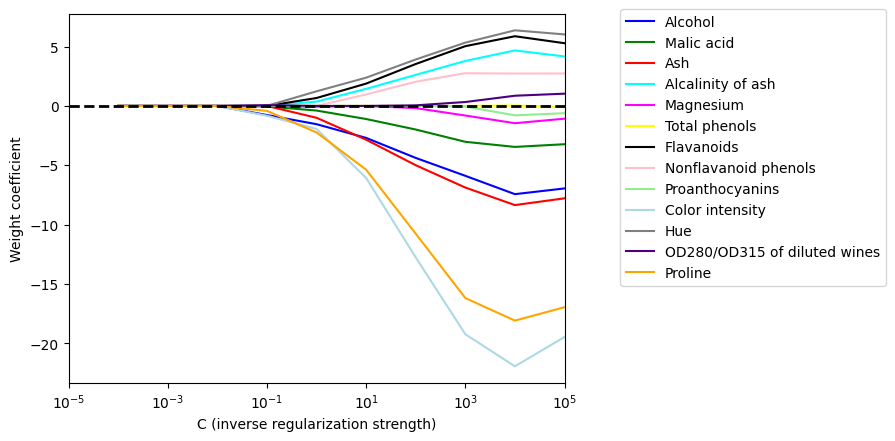

In [189]:
import matplotlib.pyplot as plt

# create a plot object
fig = plt.figure()
ax = plt.subplot(111)

colors =  ['blue', 'green', 'red', 'cyan',
           'magenta', 'yellow', 'black',
           'pink', 'lightgreen', 'lightblue',
           'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty='l1',
                          C=10.0**c,
                          solver='liblinear',
                          multi_class='ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.0**c)

# convert to numpy arr
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params,
           weights[:, column],
           label=df_wine.columns[column+1],
           color=color)

# draw a black horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
plt.legend(loc='upper center',
           bbox_to_anchor=(1.38, 1.03),
           ncol=1, fancybox=True)
plt.show()
